### EDA dữ liệu, xử lý dữ liệu dạng text, category, xử lý outlierm chạy thuật toán LR, KNN (tune tham số k), SVM (tune tham số kernel, C)

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics

## Data Assessing & Manipulation

In [91]:
car = pd.read_csv('CarPrice_Assignment.csv')
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [92]:
car.shape

(205, 26)

In [93]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [94]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [95]:
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [101]:
car.loc[car.duplicated()]

,car_ID,symboling,Brand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


#### Xử lý dữ liệu dạng text & category

In [96]:
car.doornumber.unique()

array(['two', 'four'], dtype=object)

In [97]:
car.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [98]:
# Chuyển dữ liệu text sang integer
car.doornumber.replace('two', 2, inplace=True)
car.doornumber.replace('four', 4, inplace=True)
car.cylindernumber.replace('two', 2, inplace=True)
car.cylindernumber.replace('four', 4, inplace=True)
car.cylindernumber.replace('five', 5, inplace=True)
car.cylindernumber.replace('six', 6, inplace=True)

In [99]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [100]:
# CarName format
Brand = car['CarName'].apply(lambda x : x.split(' ')[0])
car.insert(3,"Brand", Brand)
car.drop(['CarName'], axis=1, inplace=True)
car.head()

,car_ID,symboling,Brand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [106]:
car['Brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
# Sửa lỗi typo
car['Brand'].replace('maxda','mazda', inplace=True)
car['Brand'].replace('porcshce','porsche', inplace=True)
car['Brand'].replace('toyouta','toyota', inplace=True)
car['Brand'].replace('vokswagen','volkswagen', inplace=True)
car['Brand'].replace('vw','volkswagen', inplace=True)

car['Brand'].unique()

#### Xử lý outliers của mỗi feature (nếu có)

C:\Users\Dell\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


car_ID                 AxesSubplot(0.125,0.749828;0.168478x0.130172)
symboling           AxesSubplot(0.327174,0.749828;0.168478x0.130172)
doornumber          AxesSubplot(0.529348,0.749828;0.168478x0.130172)
wheelbase           AxesSubplot(0.731522,0.749828;0.168478x0.130172)
carlength              AxesSubplot(0.125,0.593621;0.168478x0.130172)
carwidth            AxesSubplot(0.327174,0.593621;0.168478x0.130172)
carheight           AxesSubplot(0.529348,0.593621;0.168478x0.130172)
curbweight          AxesSubplot(0.731522,0.593621;0.168478x0.130172)
enginesize             AxesSubplot(0.125,0.437414;0.168478x0.130172)
boreratio           AxesSubplot(0.327174,0.437414;0.168478x0.130172)
stroke              AxesSubplot(0.529348,0.437414;0.168478x0.130172)
compressionratio    AxesSubplot(0.731522,0.437414;0.168478x0.130172)
horsepower             AxesSubplot(0.125,0.281207;0.168478x0.130172)
peakrpm             AxesSubplot(0.327174,0.281207;0.168478x0.130172)
citympg             AxesSubplot(0.

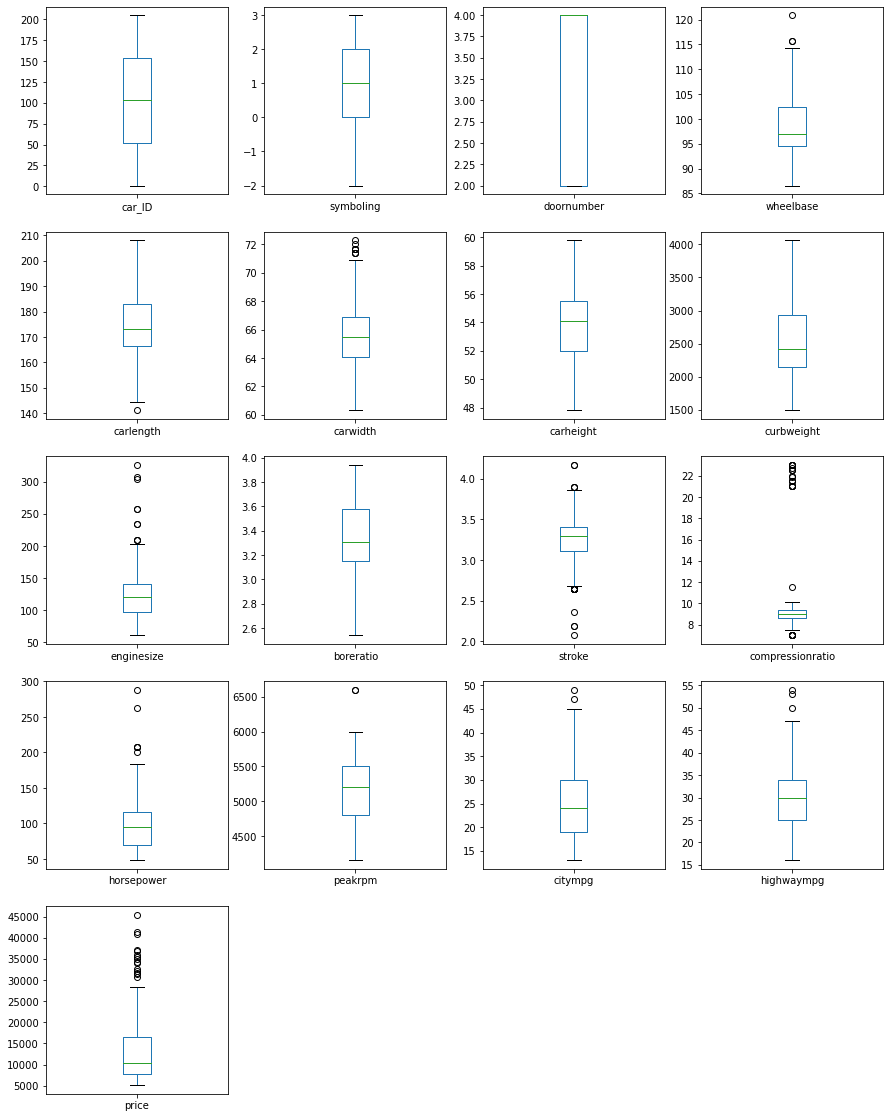

In [17]:
fig = plt.figure(figsize = (15, 20))
car.plot(kind='box', subplots=True, layout=(5,4), sharex=False, sharey=False, fontsize=10, ax=fig.gca())

In [20]:
car = car[car['wheelbase'] < 115]
car = car[car['carwidth'] < 71]
car = car[car['enginesize'] < 210]
car = car[car['stroke'] < 4]
car = car[car['stroke'] > 2.5]
car = car[car['compressionratio'] < 11]
car = car[car['horsepower'] < 190]
car = car[car['peakrpm'] < 6500]
car = car[car['citympg'] < 47]
car = car[car['highwaympg'] < 48]

In [22]:
#car.head()

## Visualization

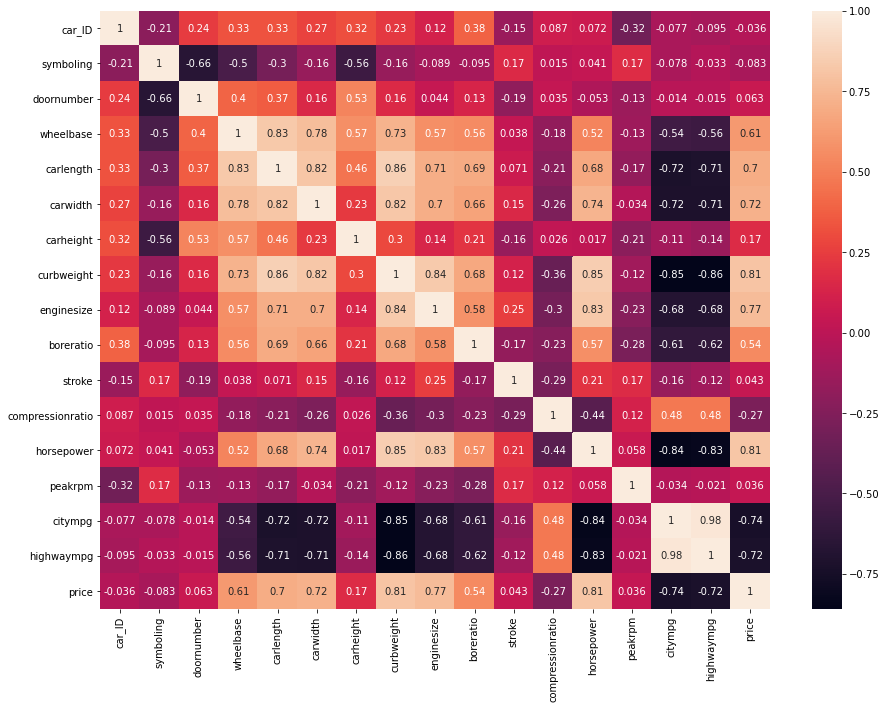

In [29]:
plt.figure(figsize=(15,11))
sns.heatmap(car.corr(), annot=True)

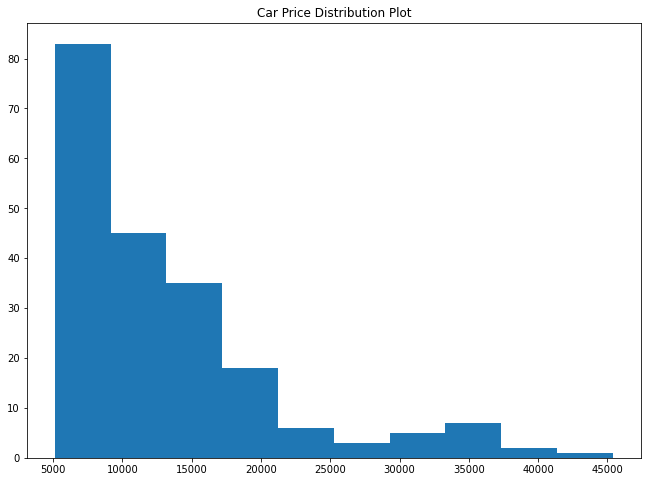

In [111]:
plt.figure(figsize=(11,8))
plt.title('Car Price Distribution Plot')
plt.hist(car.price)

plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x19e69046c40>,
 'caps': [<matplotlib.lines.Line2D at 0x19e690468b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19e69077610>],
 'medians': [<matplotlib.lines.Line2D at 0x19e69263280>],
 'fliers': [<matplotlib.lines.Line2D at 0x19e69263520>],
 'means': []}

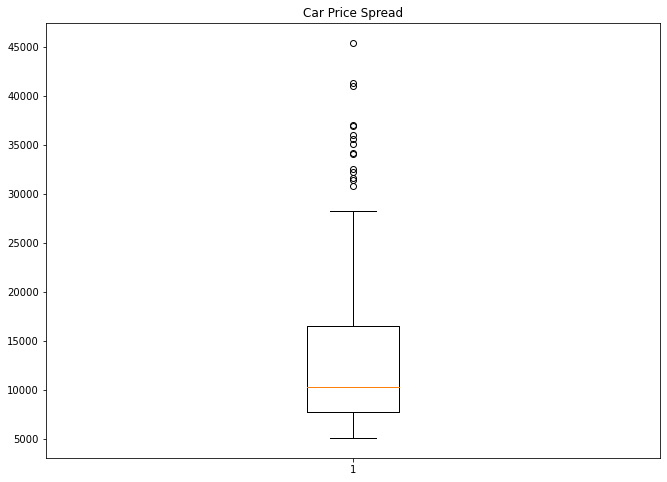

In [110]:
plt.figure(figsize=(11,8))
plt.title('Car Price Spread')
plt.boxplot(car.price)

## Model

In [73]:
# Input: Lọc bỏ dữ liệu dạng category
X = car.drop(['car_ID', 'symboling','CarName','fueltype','aspiration', 'stroke','carbody','drivewheel','enginelocation',
              'enginetype','fuelsystem', 'compressionratio', 'peakrpm', 'price'], axis=1)

y = car['price']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### a) Linear Regression

In [112]:
from sklearn import linear_model

reg = linear_model.RidgeCV(alphas=np.linspace(0.1, 2, 10))
reg.fit(X_train, y_train)
#reg.coef_

RidgeCV(alphas=array([0.1       , 0.31111111, 0.52222222, 0.73333333, 0.94444444,
       1.15555556, 1.36666667, 1.57777778, 1.78888889, 2.        ]))

In [113]:
train_pred = reg.predict(X_train)
test_pred = reg.predict(X_test)

In [114]:
print('           TRAIN')
print('MAE:', metrics.mean_absolute_error(y_train, train_pred))
print('MSE:', metrics.mean_squared_error(y_train, train_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
print('R^2:', metrics.r2_score(y_train, train_pred))

print('-----------------------')

print('           TEST')
print('MAE:', metrics.mean_absolute_error(y_test, test_pred))
print('MSE:', metrics.mean_squared_error(y_test, test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))
print('R^2:', metrics.r2_score(y_test, test_pred))

           TRAIN
MAE: 1929.270466761099
MSE: 8387159.356493539
RMSE: 2896.0592805558276
R^2: 0.7420223259487343
-----------------------
           TEST
MAE: 2188.043434696057
MSE: 8419249.909949083
RMSE: 2901.5943737795405
R^2: 0.6808554932206727


#### b) KNN

In [128]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [129]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [130]:
train_pred = knn.predict(X_train)
test_pred = knn.predict(X_test)

In [131]:
print('           TRAIN')
print('MAE:', metrics.mean_absolute_error(y_train, train_pred))
print('MSE:', metrics.mean_squared_error(y_train, train_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
print('R^2:', metrics.r2_score(y_train, train_pred))

print('-------------------------')

print('           TEST')
print('MAE:', metrics.mean_absolute_error(y_test, test_pred))
print('MSE:', metrics.mean_squared_error(y_test, test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))
print('R^2:', metrics.r2_score(y_test, test_pred))

           TRAIN
MAE: 1965.0114292035398
MSE: 11041793.650838127
RMSE: 3322.919446937907
R^2: 0.6603693667520638
-------------------------
           TEST
MAE: 1993.6330816326533
MSE: 9390835.194427155
RMSE: 3064.446963878989
R^2: 0.6440260713926798


#### c) SVR

In [82]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

param = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'C': [0.1, 1, 10, 100]}
svr = svm.SVR()
svr_cv = GridSearchCV(svr, param_grid=param)
svr_cv.fit(X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [83]:
svr_cv.best_params_

{'C': 1, 'kernel': 'linear'}

In [84]:
svr_cv.best_score_

0.6834591874868802

In [85]:
train_pred = svr_cv.predict(X_train)
test_pred = svr_cv.predict(X_test)

In [86]:
print('           TRAIN')
print('MAE:', metrics.mean_absolute_error(y_train, train_pred))
print('MSE:', metrics.mean_squared_error(y_train, train_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
print('R^2:', metrics.r2_score(y_train, train_pred))

print('-------------------------')

print('           TEST')
print('MAE:', metrics.mean_absolute_error(y_test, test_pred))
print('MSE:', metrics.mean_squared_error(y_test, test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))
print('R^2:', metrics.r2_score(y_test, test_pred))

           TRAIN
MAE: 1786.2818249038282
MSE: 10373312.979513673
RMSE: 3220.7627946673865
R^2: 0.680930927753405
-------------------------
           TEST
MAE: 1772.7835719995976
MSE: 7099542.652136668
RMSE: 2664.4966977154745
R^2: 0.7308810093168198
